In [24]:
import pandas as pd
import numpy as np


In [25]:
data = pd.read_csv('housing_data.csv')
data.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [26]:
data.shape

(1460, 81)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
data.dtypes.value_counts()

object     45
int64      35
float64     1
dtype: int64

In [29]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      4
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
MoSold           12
SaleType          9
SaleCondition     6
dtype: int64

In [30]:
def missing_values_table(df):
        """Function to calculate missing values by column# Funct // credits Will Koehrsen"""
    
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("the dataset to " + str(data.shape[1]) + " columns.\n"      
            "Their are " + str(mis_val_table_ren_columns.shape[0]) +
              " Columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [31]:
missing_values = missing_values_table(data)
missing_values.head(10)

the dataset to 81 columns.
Their are 2 Columns with missing values.


,Missing Values,% of Total Values
GarageYrBlt,81,5.5
Electrical,1,0.1


In [32]:
cat_feat = list(data.select_dtypes('object').columns)
num_feat = list(data.select_dtypes(exclude='object').columns)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rites\AppData\Local\Temp\ipykernel_19544\446721260.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.SalePrice, shade=True)


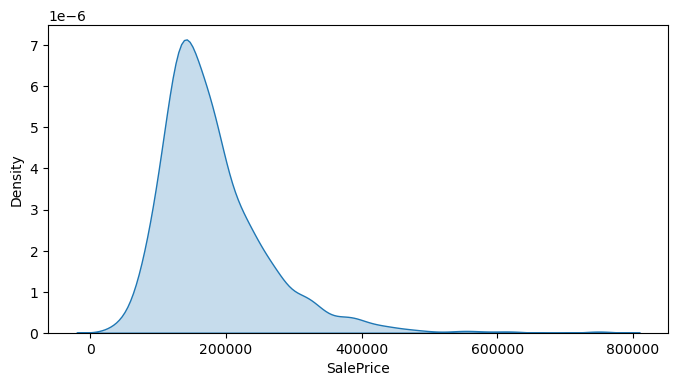

In [34]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data.SalePrice, shade=True)
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_19544\920232462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.MSZoning==zone].SalePrice, label=zone, hist=False)
C:\Users\rites\AppData\Local\Temp\ipykernel_19544\920232462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

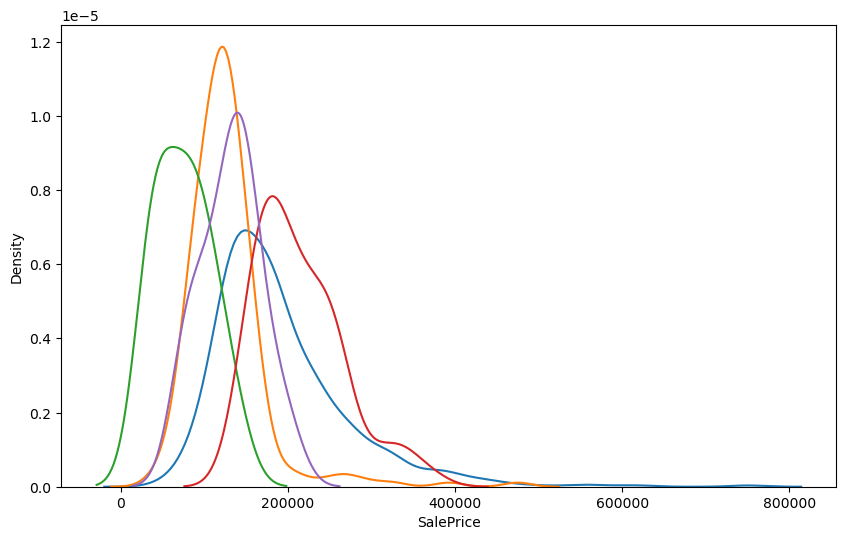

In [35]:
plt.figure(figsize=(10, 6))
for zone in list(data.MSZoning.unique()):
    sns.distplot(data[data.MSZoning==zone].SalePrice, label=zone, hist=False)
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_19544\1490347931.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.MSSubClass==ms_sub_class].SalePrice, label=ms_sub_class, hist=False)
C:\Users\rites\AppData\Local\Temp\ipykernel_19544\1490347931.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

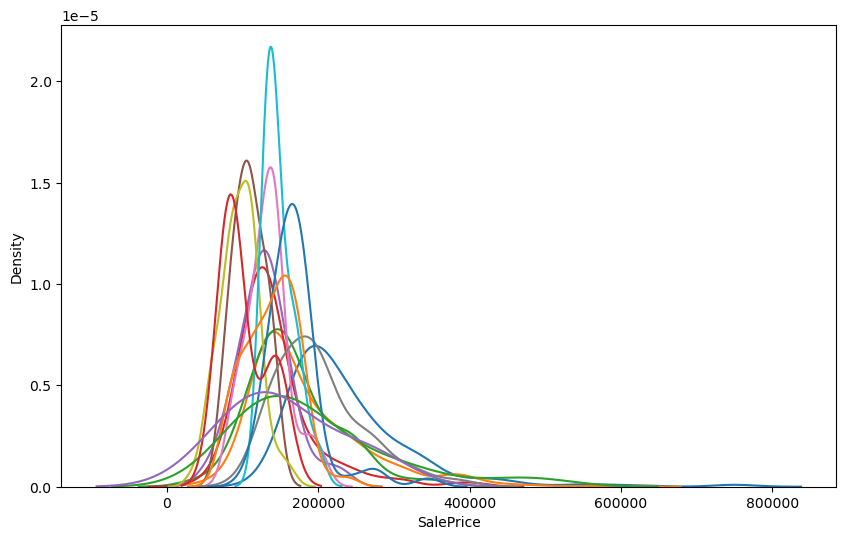

In [36]:
plt.figure(figsize=(10, 6))
for ms_sub_class in list(data.MSSubClass.unique()):
    sns.distplot(data[data.MSSubClass==ms_sub_class].SalePrice, label=ms_sub_class, hist=False)
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_19544\274573402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.OverallQual==qual].SalePrice, label=qual, hist=False)
C:\Users\rites\AppData\Local\Temp\ipykernel_19544\274573402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

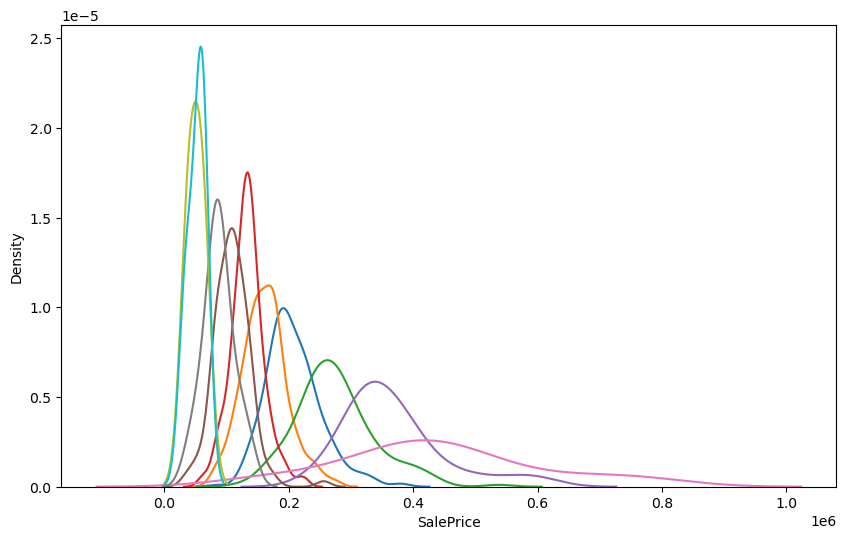

In [37]:
plt.figure(figsize=(10, 6))
for qual in list(data.OverallQual.unique()):
    sns.distplot(data[data.OverallQual==qual].SalePrice, label=qual, hist=False)
plt.show()

In [38]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Correlations

In [39]:
import numpy as np

C:\Users\rites\AppData\Local\Temp\ipykernel_19544\391092365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

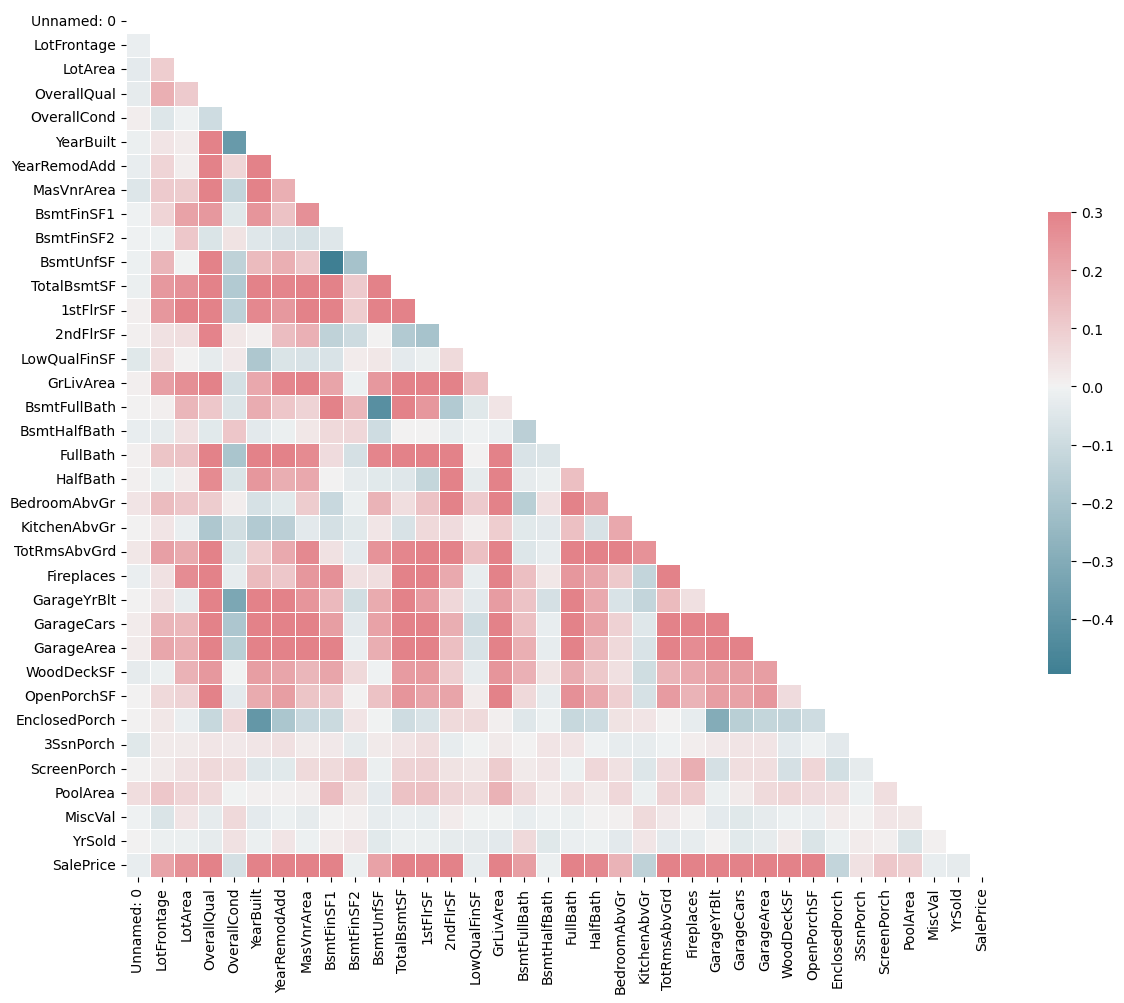

In [40]:
corr = data.corr()
corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

# Top 50% Corralation train attributes with sale-price

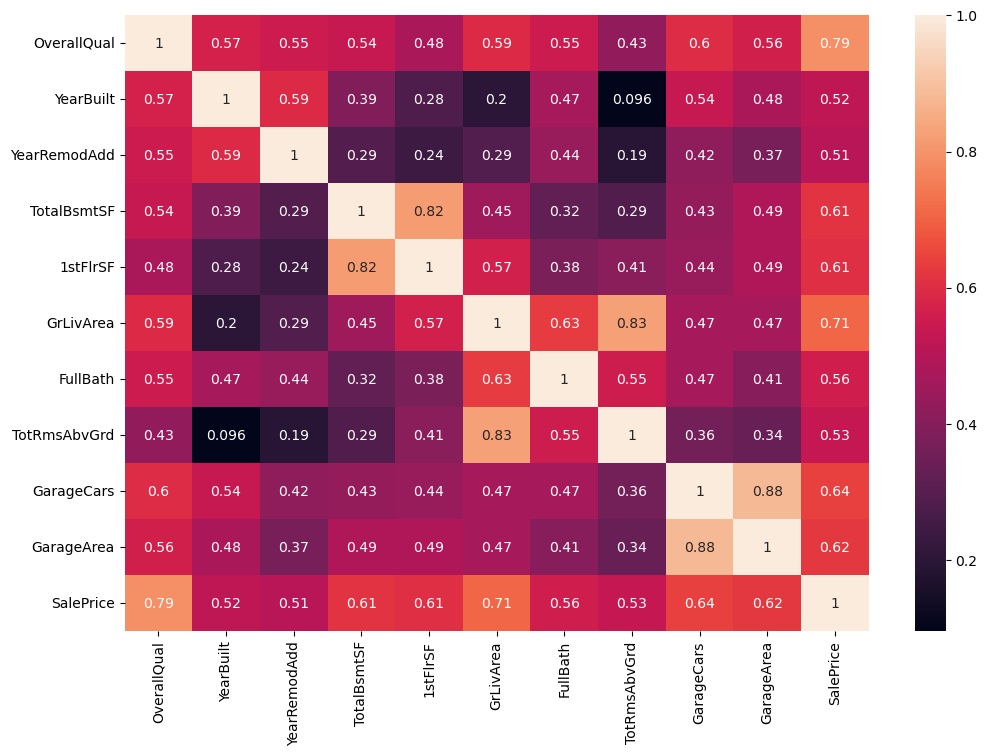

In [41]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# OverallQual is highly correlated with target feature of saleprice by near 80%

In [42]:
import seaborn as sns

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

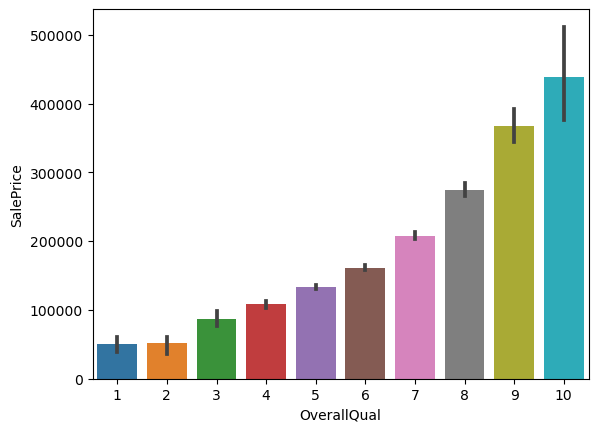

In [43]:
sns.barplot(x=data.OverallQual,y=data.SalePrice)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

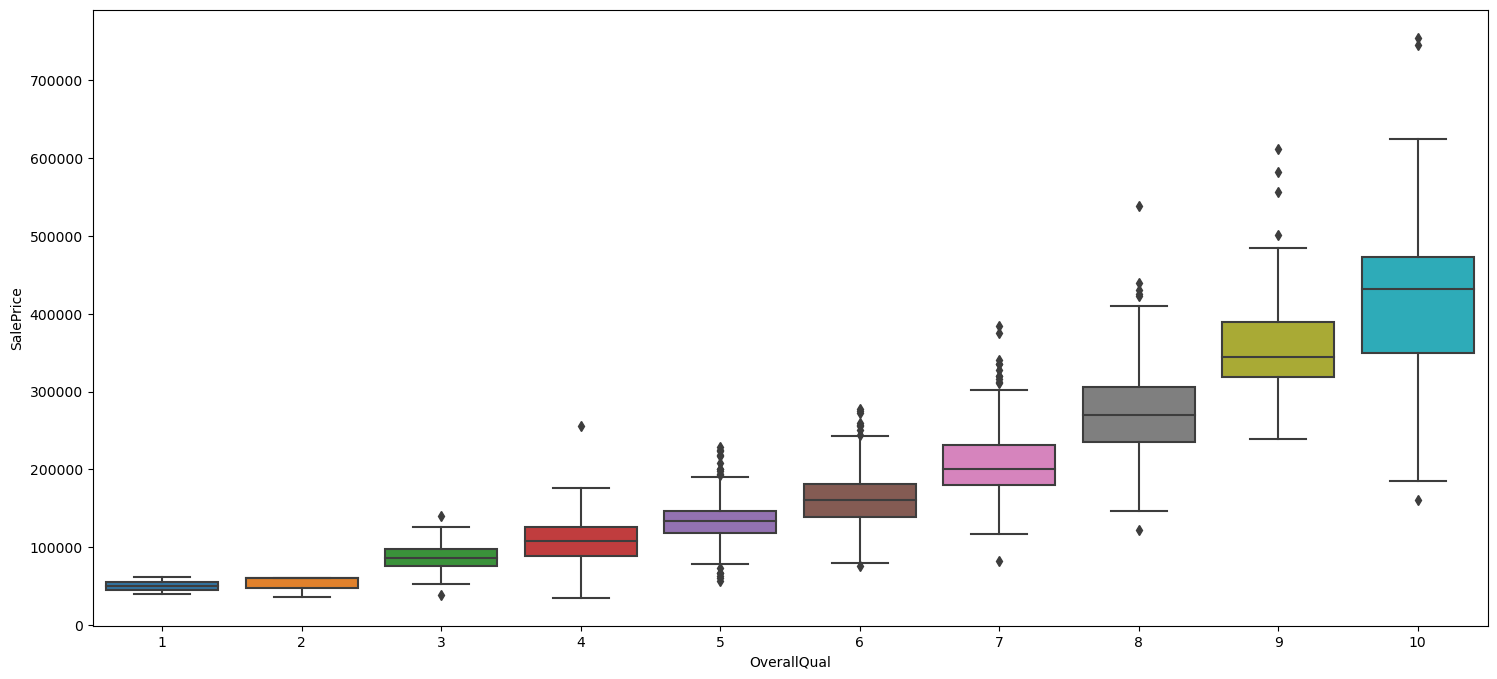

In [44]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=data.OverallQual, y=data.SalePrice)

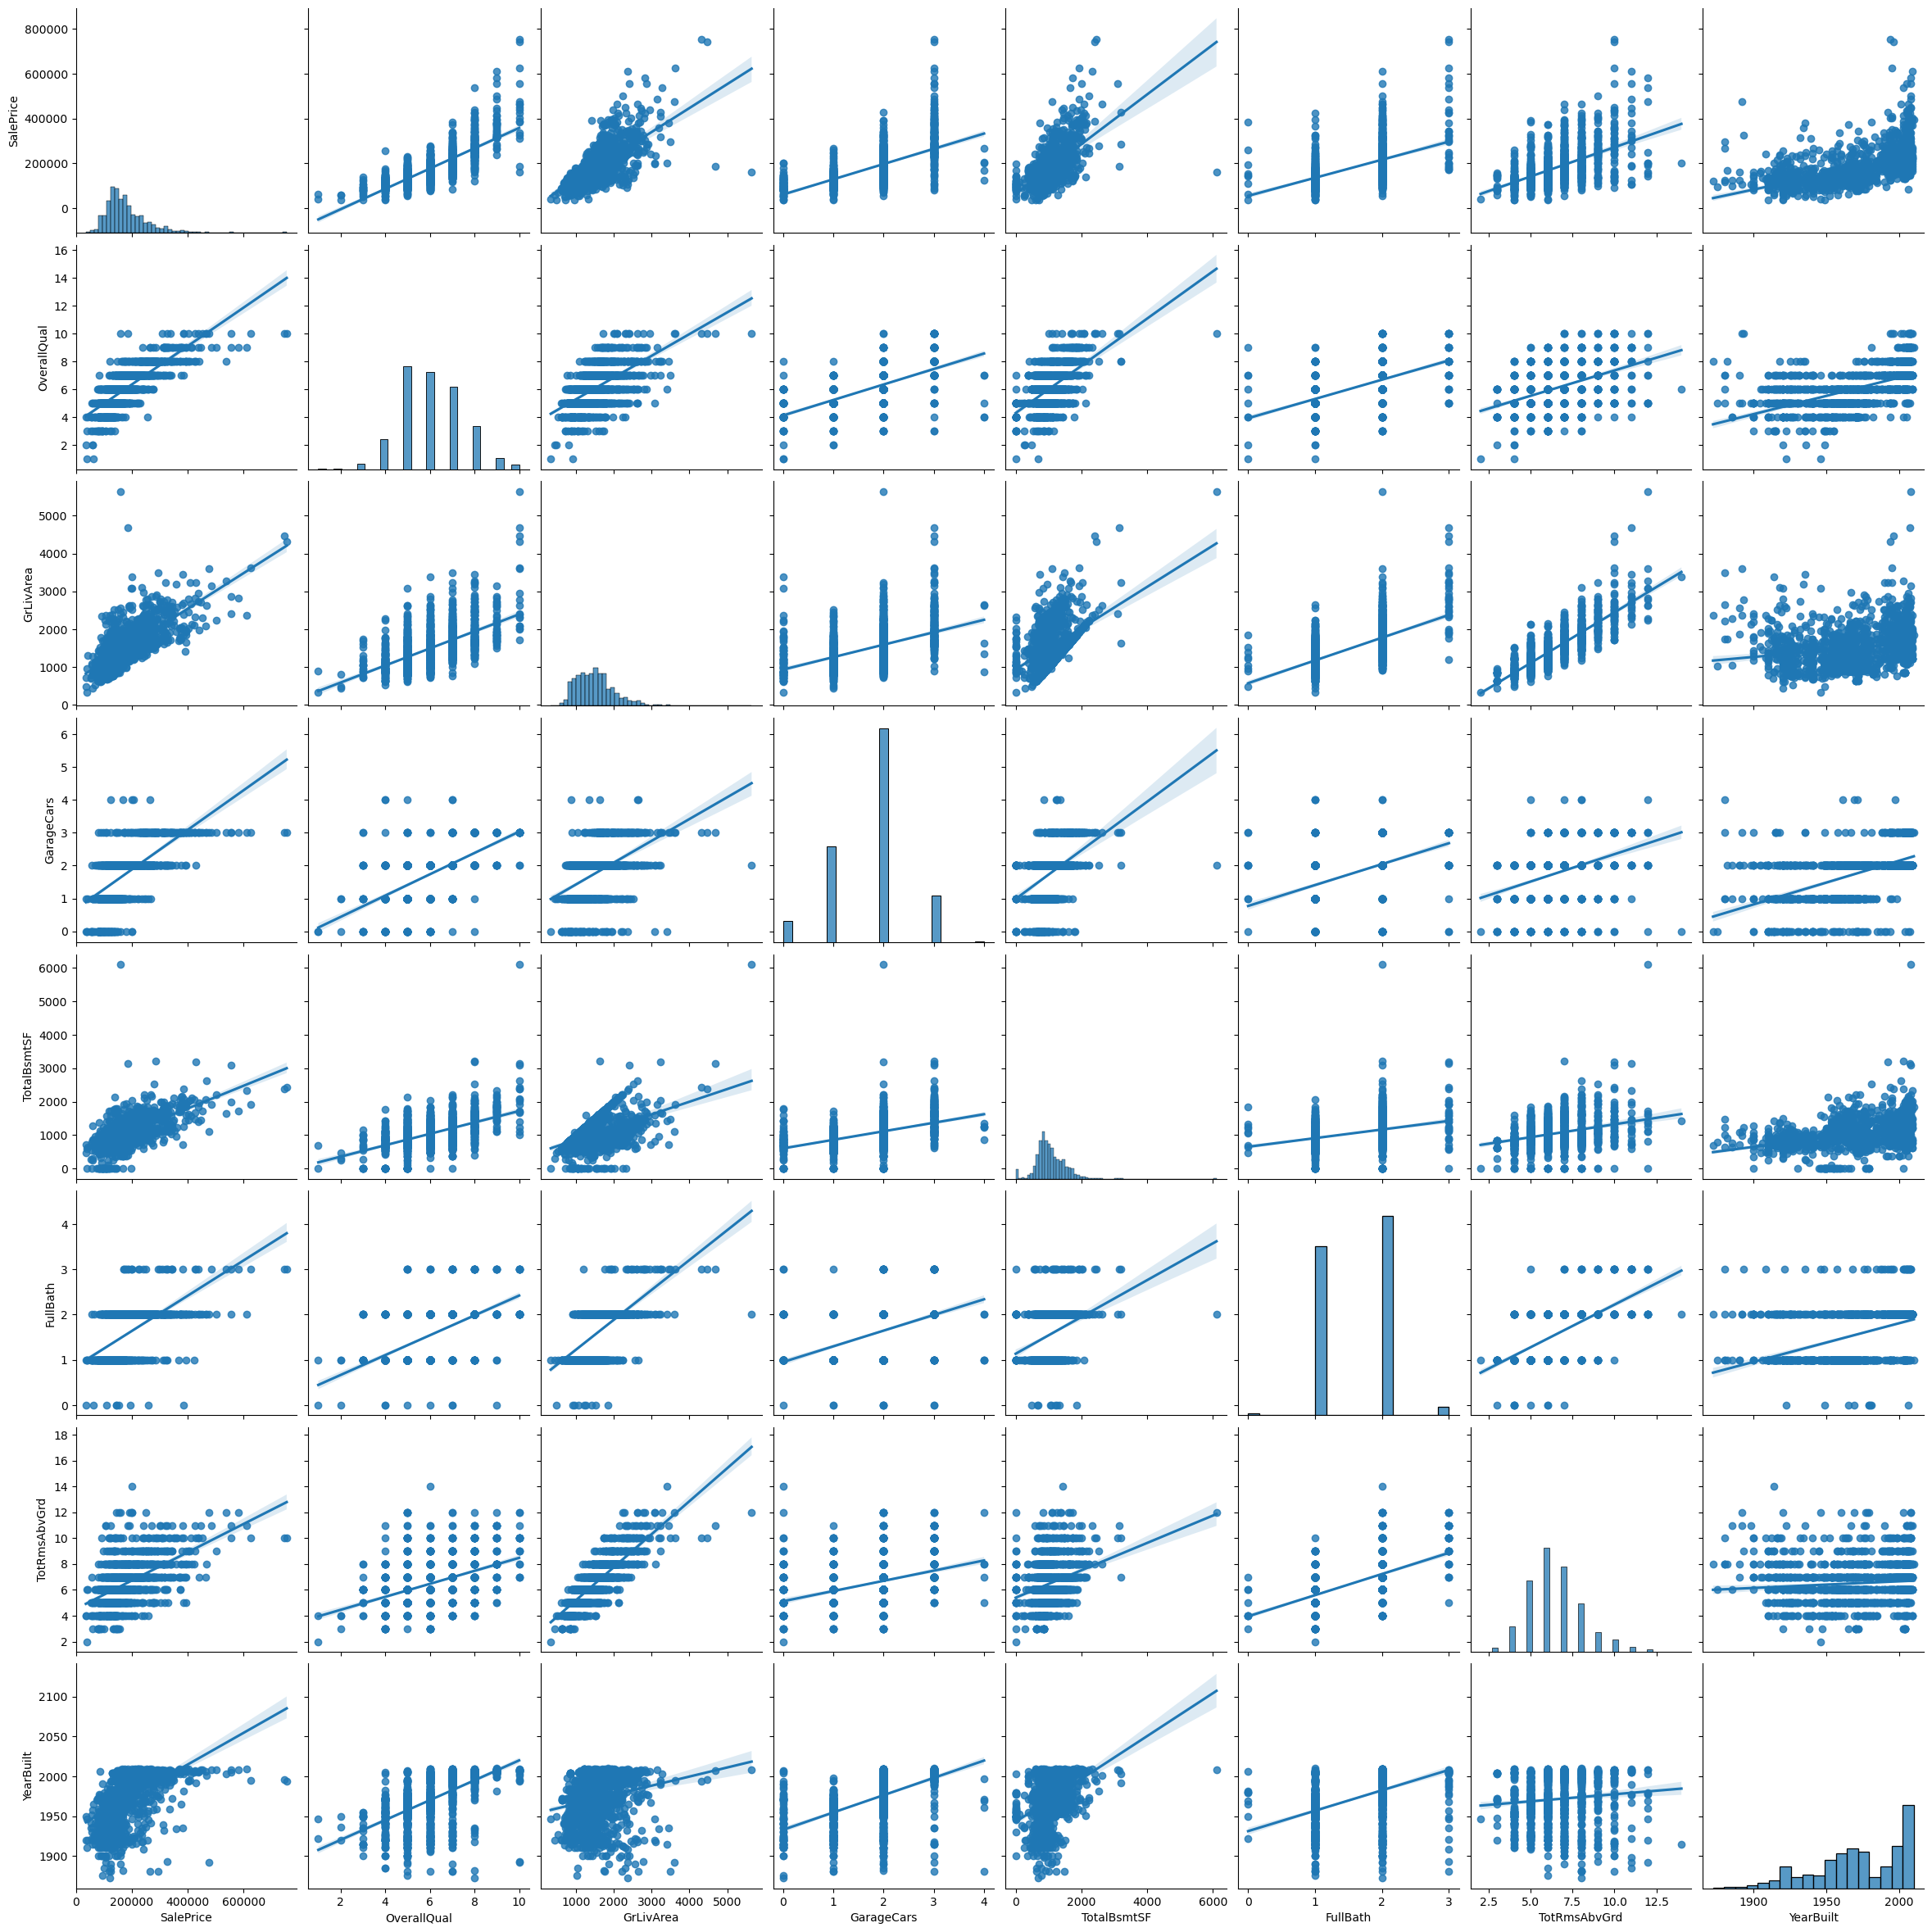

In [45]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data[col], height=3, kind='reg')

In [46]:
print("Most postively correlated features with the target")
corr = data.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Most postively correlated features with the target


C:\Users\rites\AppData\Local\Temp\ipykernel_19544\1945029316.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Unnamed: 0      -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [47]:
# Data preparation & feature engineering
## Dealing with abnormal values
### Data cleaning & Label encoding of categorical features

In [48]:
data.duplicated().sum()

0

# Let's remove columns with a high ratio of missing values

## We don't have much samples, so instead of removing rows with nan, missing values are then replaced by the median

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
def prepare_data(dataframe):

    dataframe = dataframe.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

    cat_feat = list(dataframe.select_dtypes('object').columns)
    num_feat = list(dataframe.select_dtypes(exclude='object').columns)

    dataframe[num_feat] = dataframe[num_feat].fillna(dataframe[num_feat].median())
    dataframe[cat_feat] = dataframe[cat_feat].fillna("Not communicated")
    
    for c in cat_feat:
        lbl = LabelEncoder() 
        lbl.fit(list(dataframe[c].values)) 
        dataframe[c] = lbl.transform(list(dataframe[c].values))
    
    return dataframe
data = prepare_data(data)

## Creation of new features

* In this case, it's complicated to add features from an other dataset because no information is provided with the CSV file we're using.
* All columns except the id (used as index) seems to be relevant, so all of them are kept at first.
* We can also combine features to create new ones - but in this case it doesn't seem to be really usefull.

## Standardization / normalization

#Not needed here

In [ ]:
#df[num_feat] = MinMaxScaler().fit_transform(df[num_feat])

## Feature selection  & and data preparation for models

In [52]:
y = data['SalePrice']
X = data.drop(columns=['SalePrice'])
X.shape, y.shape

((1460, 75), (1460,))

# Let's split the data into a train and a test set

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 75), (292, 75), (1168,), (292,))

## Feature importance

# Top 10 most important features:

In [57]:
from sklearn.ensemble import RandomForestRegressor


In [58]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rnd_reg.fit(X, y)

feature_importances = pd.DataFrame(rnd_reg.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [59]:
feature_importances[:10]

,importance
OverallQual,0.580327
GrLivArea,0.109025
TotalBsmtSF,0.039168
2ndFlrSF,0.034690
BsmtFinSF1,0.027308
1stFlrSF,0.023184
GarageCars,0.022670
GarageArea,0.014621
LotArea,0.014243
YearBuilt,0.009794


Graph with features sorted by importance

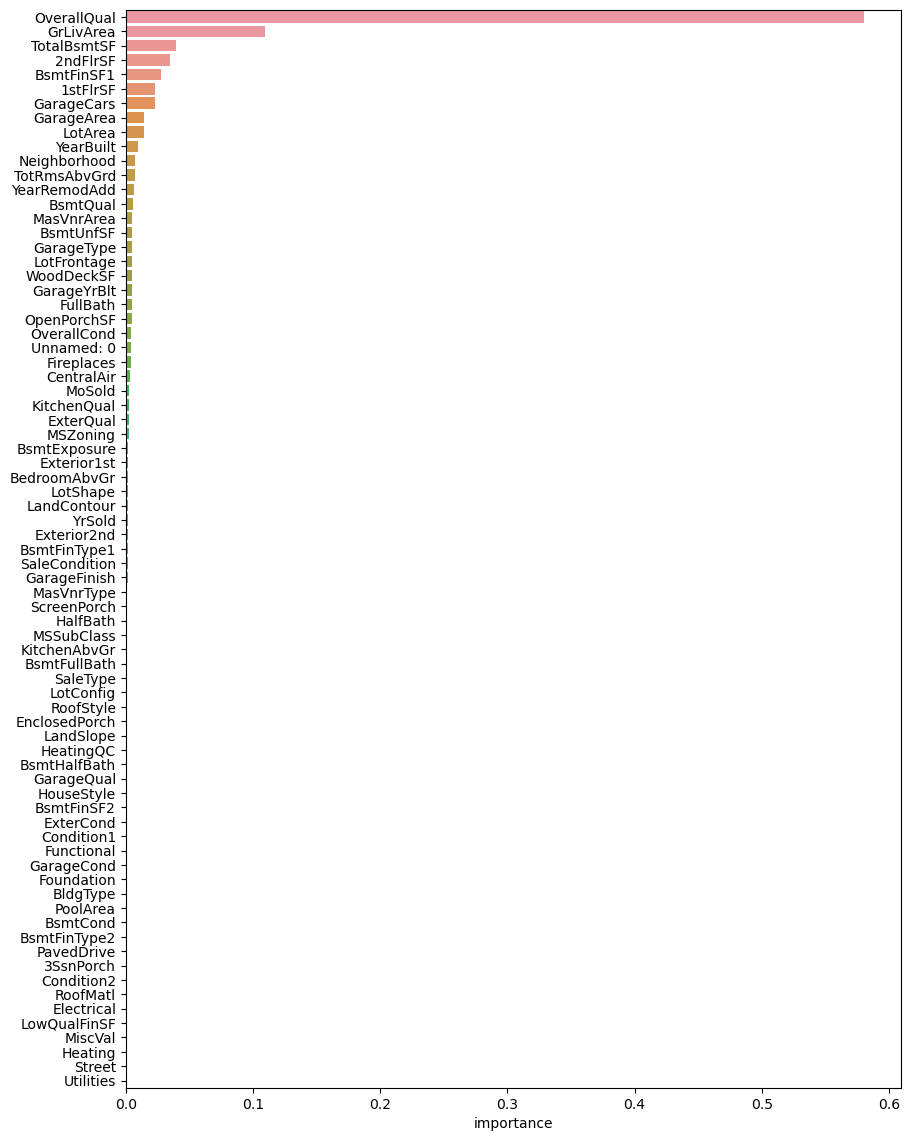

In [60]:
plt.figure(figsize=(10, 14))
sns.barplot(x="importance", y=feature_importances.index, data=feature_importances)
plt.show()

# Training models and results

## Baselines - first selection of models

In [61]:
# f1_score binary by default
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.0f} / RMSE on Test = {rmse_test:.0f}')
    
    return rmse_train, rmse_test

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor






In [82]:
model_list = [
    LinearRegression(), Lasso(), SVR(),
    RandomForestRegressor(), GradientBoostingRegressor(), Ridge(), ElasticNet(), LinearSVC(),
    BayesianRidge(), ExtraTreesRegressor()
             ]

In [83]:
model_names = [str(m)[:str(m).index('(')] for m in model_list]
rmse_train, rmse_test = [], []

In [84]:
model_names

['LinearRegression',
 'Lasso',
 'SVR',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'Ridge',
 'ElasticNet',
 'LinearSVC',
 'BayesianRidge',
 'ExtraTreesRegressor']

In [86]:
from sklearn.metrics import mean_squared_error


In [87]:
for model, name in zip(model_list, model_names):
    model.fit(X_train, y_train)
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)

LinearRegression 	 - RMSE on Training  = 28350 / RMSE on Test = 51336
Lasso 	 - RMSE on Training  = 28350 / RMSE on Test = 51340
SVR 	 - RMSE on Training  = 78149 / RMSE on Test = 93275
RandomForestRegressor 	 - RMSE on Training  = 10414 / RMSE on Test = 42525
GradientBoostingRegressor 	 - RMSE on Training  = 13985 / RMSE on Test = 42650
Ridge 	 - RMSE on Training  = 28359 / RMSE on Test = 51401


C:\Users\rites\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+11, tolerance: 6.794e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet 	 - RMSE on Training  = 29815 / RMSE on Test = 53693


C:\Users\rites\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC 	 - RMSE on Training  = 82262 / RMSE on Test = 97596
BayesianRidge 	 - RMSE on Training  = 28629 / RMSE on Test = 52126
ExtraTreesRegressor 	 - RMSE on Training  = 0 / RMSE on Test = 40788


In [ ]:
Results comparison chart

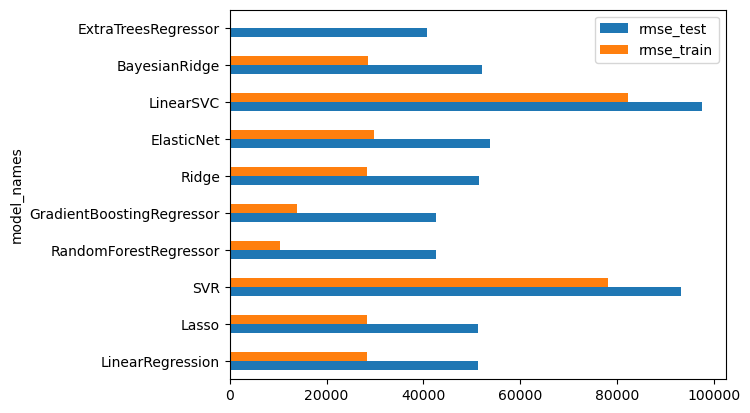

In [88]:
df_score = pd.DataFrame({'model_names' : model_names,
                         'rmse_train' : rmse_train,
                         'rmse_test' : rmse_test})
ax = df_score.plot.barh(y=['rmse_test', 'rmse_train'], x='model_names')

The LinearSVC model isn't performing well because data haven't been scaled before,So,I will try to do it with a pipeline

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [93]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", LinearSVC())
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_rbf")

svr_rbf 	 - RMSE on Training  = 2242 / RMSE on Test = 76562


C:\Users\rites\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [94]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, y_train)
_, _ = get_rmse(svr_rbf, "svr_rbf")

svr_rbf 	 - RMSE on Training  = 78149 / RMSE on Test = 93275


In [96]:
from sklearn.linear_model import SGDRegressor


In [97]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVR())
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_rbf")

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVR(kernel="poly"))
])
svm_reg.fit(X_train, y_train)
_, _ = get_rmse(svm_reg, "svr_poly")

sgd_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_regresssor", SGDRegressor())
])
sgd_reg.fit(X_train, y_train)
_, _ = get_rmse(sgd_reg, "sgd_reg") 

svr_rbf 	 - RMSE on Training  = 78125 / RMSE on Test = 93260
svr_poly 	 - RMSE on Training  = 78139 / RMSE on Test = 93269
sgd_reg 	 - RMSE on Training  = 29311 / RMSE on Test = 58060


In [104]:
import xgboost as xgb



In [105]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
_, _ = get_rmse(xgb_reg, "xgb_reg")

xgb_reg 	 - RMSE on Training  = 810 / RMSE on Test = 45823


# we shall keep the three models namely xgb regressor,Gradient Boosting Regressor and Random Forest Regressor for the hyperparameters tuning

## Model optimisation

In [ ]:
### RandomForrestReg

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:

rf = RandomForestRegressor()
param_grid = { 
    'n_estimators': [80, 100, 120],
    'max_features': [14, 15, 16, 17],
    'max_depth' : [14, 16, 18]
}


rfc_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
rfc_cv.fit(X_train, y_train)
print(rfc_cv.best_params_)
_, _ = get_rmse(rfc_cv, "rfc_reg")

{'max_depth': 14, 'max_features': 16, 'n_estimators': 100}
rfc_reg 	 - RMSE on Training  = 9836 / RMSE on Test = 42117


### GradientBoostingReg

In [111]:
gb = GradientBoostingRegressor()
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': [14, 15, 16, 17],
    'max_depth' : [1, 2, 8, 14, 18]
}


gb_cv = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
_, _ = get_rmse(gb_cv, "gb_cv")

{'max_depth': 1, 'max_features': 15, 'n_estimators': 400}
gb_cv 	 - RMSE on Training  = 19742 / RMSE on Test = 44759


### XGBoostReg

In [112]:
xg = xgb.XGBRegressor()
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': [10, 14, 16],
    'max_depth' : [1, 2, 8, 18]
}


xg_cv = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1)
xg_cv.fit(X_train, y_train)
print(xg_cv.best_params_)
_, _ = get_rmse(xg_cv, "xg_cv")

C:\Users\rites\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


{'max_depth': 2, 'max_features': 10, 'n_estimators': 400}
xg_cv 	 - RMSE on Training  = 7431 / RMSE on Test = 45747


## Combination of the best models & submission

In [118]:
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are your datasets in DataFrame format:
X_train.to_csv('train_features.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)


In [122]:
df_test = pd.read_csv('test_features.csv')
df_test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,498,4,3,65,7800,1,3,3,0,4,...,0,0,0,0,0,0,6,2009,8,4
1,1373,4,3,0,11400,1,3,3,0,4,...,140,0,0,0,0,0,7,2007,8,4
2,713,3,3,60,9873,1,3,3,0,4,...,288,0,0,0,0,0,8,2006,8,4
3,1,4,3,80,9600,1,3,3,0,2,...,0,0,0,0,0,0,8,2007,8,4
4,198,11,4,92,5520,1,3,3,0,0,...,198,30,0,0,0,0,5,2009,8,0


In [124]:
print(df_test.columns)


Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

In [125]:
rfc_sub, gb_sub, xg_sub = rfc_cv.predict(df_test), gb_cv.predict(df_test), xg_cv.predict(df_test)

In [126]:
sub = pd.DataFrame()
sub['Id'] = df_test.index
sub['SalePrice'] = np.mean([rfc_sub, gb_sub, xg_sub], axis=0) / 3
sub.to_csv('submission.csv',index=False)